<a href="https://colab.research.google.com/github/dralston78/Diffusion-map-analysis/blob/main/Diffusion_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Librarys

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import os

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import make_swiss_roll

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Create Swissroll

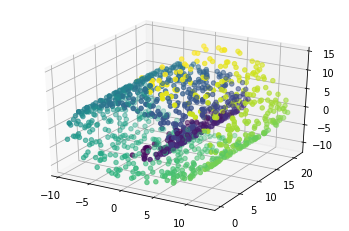

In [ ]:
swissroll, color = make_swiss_roll(n_samples=1200,)
swissroll = np.array(swissroll)


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(swissroll[:,0], swissroll[:,1], swissroll[:,2], c=color);

In [ ]:
mnist = pd.read_csv("/content/sample_data/mnist_test.csv")
mnist = np.array(mnist)
mnist = mnist[:1000,:]

for i in range(mnist.shape[0]):
  mnist[i,:] = mnist[i,:]/255

Diffusion Algorithm

In [ ]:
def k(x,y,epsilon):
  dist = np.linalg.norm(x-y, ord = 1)
  return float(np.exp(-(dist**2)/epsilon))

# def L1(x,y):
#   dist = np.linalg.norm(x-y,ord=1)
#   return dist

def make_kernel_matrix(X,epsilon=1):
    m = X.shape[0]
    output = np.zeros((m,m))
    for i in range(m):
      for j in range(m):
        # output[i,j] = L1(X[i,:], X[j,:])
        output[i,j] = k(X[i,:], X[j,:], epsilon)
    return output


def make_diffusion_matrix(K, alpha=0.5):
  row_sums = np.sum(K,axis=1)
  D_neg_alpha = sp.linalg.fractional_matrix_power(np.diag(row_sums), -alpha)

  L_alpha = np.matmul(D_neg_alpha, np.matmul(K, D_neg_alpha))
  D_alpha = np.diag(np.sum(L_alpha, axis=1))
  M = np.matmul((np.linalg.inv(D_alpha)), L_alpha)
  return M

def diffusion_map(M, t=10, col=np.array([None])):
  eigval, eigvec = np.linalg.eigh(M)

  if col.any() == None:
    plt.scatter((eigval[-2]**(t))*eigvec[:,-2], (eigval[-3]**(t))*eigvec[:,-3])
  else:
    plt.scatter((eigval[-2]**(t))*eigvec[:,-2], (eigval[-3]**(t))*eigvec[:,-3], c=col)

  return np.array([(eigval[-2]**(t))*eigvec[:,-2], (eigval[-3]**(t))*eigvec[:,-3]])

Implementation

array([[-0.03846534, -0.01374706, -0.03050127, ..., -0.00585764,
        -0.03732366, -0.03663354],
       [ 0.00255267,  0.03754653,  0.03617271, ...,  0.03528965,
        -0.00658431, -0.02072244]])

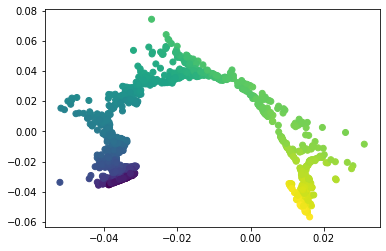

In [ ]:
A = make_diffusion_matrix(make_kernel_matrix(swissroll, epsilon=6), alpha=.8)
diffusion_map(A, col=color)

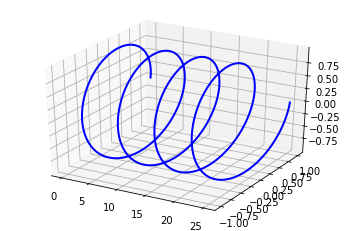

In [ ]:
n = 1000
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#plot helix along the x-axis
theta_max = 8 * np.pi
theta = np.linspace(0, theta_max, n)
x = theta
z =  np.sin(theta)
y =  np.cos(theta)
ax.plot(x, y, z, 'b', lw=2)

plt.show()

array([[-0.01005354, -0.0102888 , -0.01052211, ...,  0.01465466,
         0.01465273,  0.01465805],
       [ 0.01408211,  0.01440609,  0.01472671, ...,  0.01857411,
         0.01857962,  0.01859421]])

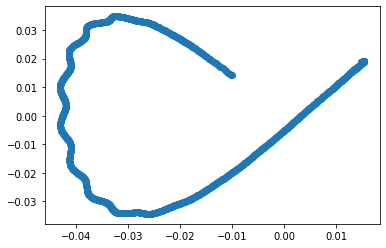

In [ ]:
helix = np.array([x,y,z]).T

D = make_diffusion_matrix(make_kernel_matrix(helix, epsilon=6), alpha=0)
diffusion_map(D)

array([[ 1.07279995e-48,  1.85704748e-49,  5.35872120e-49, ...,
         3.16847932e-49,  2.80864389e-49,  2.48002560e-49],
       [-5.39292150e-53, -8.19972160e-53,  3.93967060e-52, ...,
         1.46567437e-52,  9.22453092e-53, -1.25096167e-52]])

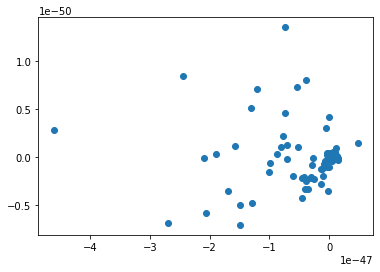

In [ ]:
B = make_diffusion_matrix(make_kernel_matrix(mnist, epsilon=10000000), alpha=1)
diffusion_map(B)

In [ ]:
!pip install gif2numpy

  Created wheel for gif2numpy: filename=gif2numpy-1.3-py2.py3-none-any.whl size=8392 sha256=e42141e9256084ff18de88efdd95814c0304798319cc9078fd869f941f873d9d
  Stored in directory: /root/.cache/pip/wheels/f3/b4/92/861a1362ff54a424d18deded9ea868d0dcc2a678f4646050c9
  Created wheel for kaitaistruct: filename=kaitaistruct-0.9-py2.py3-none-any.whl size=5512 sha256=e9214c63789106a1f55459dca9d218fc455670f32b1934bd804122bad9d87954
  Stored in directory: /root/.cache/pip/wheels/c6/59/67/5471a21f905f5cf5a9d47e3f43bfb87b13c69d63575fcade6b
Successfully built gif2numpy kaitaistruct


In [ ]:
# import gif2numpy
# from google.colab.patches import cv2_imshow
# pend_frames, extensions, image_specifications = gif2numpy.convert("/content/pendulum.gif")

# for i in range(len(pend_frames)):
#   pend_frames[i] = np.reshape(pend_frames[i][:,:,0], 500*240)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# pend_frames = np.array(pend_frames)

In [ ]:
# C = make_diffusion_matrix(make_kernel_matrix(pend_frames, epsilon=10), alpha=0)
# diffusion_map(C, col=None)

In [ ]:
import glob
import imageio

files = glob.glob('/content/view1_100x100_*')

b_frames = []

for each in files:
  im = imageio.imread(each)
  im = np.array(im[:,:,0])
  b_frames.append(np.reshape(im, 100*100)/255)

b_frames = np.array(b_frames)

array([[-0.00099988,  0.14198873,  0.20242368,  0.14206185, -0.00392068,
        -0.00391513,  0.0051927 ,  0.06986863,  0.19291231,  0.14340503,
         0.00989054,  0.16077351,  0.19605443,  0.1337559 ,  0.19772457,
        -0.00410141,  0.11327987,  0.03110166,  0.18423655,  0.00993292,
         0.17458318,  0.00147739,  0.1336683 , -0.00288731,  0.03114069,
        -0.00282512,  0.14615215,  0.14320637,  0.20004594,  0.16918513,
         0.15387552,  0.1770673 ,  0.1439428 ,  0.14396532,  0.14922813,
        -0.00389211,  0.14382637, -0.00451599,  0.17714112,  0.14929823,
         0.19497474, -0.0039096 ,  0.04875393,  0.0015462 ,  0.16094297,
         0.09156551,  0.19459046, -0.00410759,  0.09146029,  0.18638467,
         0.15481322,  0.00515976,  0.06978312, -0.00100085, -0.00460164,
         0.19154807,  0.1712225 ,  0.01846022,  0.16900305,  0.04880578,
        -0.00430703, -0.00432166, -0.00394347,  0.1716872 , -0.00397661,
         0.0185244 ,  0.11336307, -0.0039486 ,  0.1

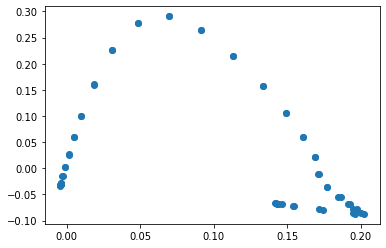

In [ ]:
E = make_diffusion_matrix(make_kernel_matrix(b_frames, epsilon=1000), alpha=1)
diffusion_map(E)